In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 스케일링

대상 : Numerical한 변수 전체

Scaler : MinMaxScaler

In [16]:
df = pd.read_excel('./feature_preprocessed.xlsx', engine='openpyxl')
df.head()

,price,author,year,genre,source,date,area,base_charcoal,base_paper,base_fiber,...,mate_collage,mate_engrave,mate_crayon,mate_enamel,mate_oilpastel,online,KOSPI_Close,WTI_Close,rate_Close,estate_rate
0,900000,0,1968,1,2,2021-06-30,4507,0,1,0,...,0,0,0,0,0,1,3296.68,73.47,"1,130.48",116.6
1,850000,0,2015,1,1,2021-06-23,7270,0,1,0,...,0,0,0,0,0,1,3276.19,73.08,"1,135.85",116.6
2,680000000,0,1969,0,0,2021-06-23,10302,0,0,1,...,0,0,0,0,0,0,3276.19,73.08,"1,135.85",116.6
3,3050000000,0,1971,0,1,2021-06-22,22266,0,0,1,...,0,0,0,0,0,0,3263.88,73.06,"1,133.57",116.6
4,72000000,0,1968,0,1,2021-06-22,2169,0,1,0,...,0,0,0,0,0,0,3263.88,73.06,"1,133.57",116.6


In [17]:
df = df.dropna()
df.describe()

,price,author,year,genre,source,area,base_charcoal,base_paper,base_fiber,base_canvas,...,mate_conte,mate_collage,mate_engrave,mate_crayon,mate_enamel,mate_oilpastel,online,KOSPI_Close,WTI_Close,estate_rate
count,7.882000e+03,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,...,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,4.376575e+07,14.110759,1984.838620,0.461050,1.068637,4202.821111,0.002664,0.656432,0.090459,0.185867,...,0.000761,0.004060,0.000634,0.000254,0.000127,0.002030,0.613042,2415.851610,54.628084,102.197496
std,1.782427e+08,9.808419,210.975973,0.678353,1.632211,6379.387520,0.051551,0.474929,0.286857,0.389024,...,0.027582,0.063592,0.025180,0.015928,0.011264,0.045012,0.487085,407.392155,11.817501,6.437329
min,5.000000e+04,0.000000,19.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1482.460000,-37.630000,95.700000
25%,8.500000e+05,4.000000,1976.000000,0.000000,0.000000,1056.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2108.220000,48.040000,97.100000
50%,3.400000e+06,13.000000,1989.000000,0.000000,0.000000,2411.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2309.030000,56.220000,99.830000
75%,2.500000e+07,23.750000,2003.000000,1.000000,2.000000,4405.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2515.430000,63.220000,104.900000
max,6.550000e+09,29.000000,20112.000000,7.000000,7.000000,80000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3301.890000,75.300000,116.600000


In [18]:
df = df.replace(',','', regex=True)

In [19]:
df.head()

,price,author,year,genre,source,date,area,base_charcoal,base_paper,base_fiber,...,mate_collage,mate_engrave,mate_crayon,mate_enamel,mate_oilpastel,online,KOSPI_Close,WTI_Close,rate_Close,estate_rate
0,900000,0,1968,1,2,2021-06-30,4507,0,1,0,...,0,0,0,0,0,1,3296.68,73.47,1130.48,116.6
1,850000,0,2015,1,1,2021-06-23,7270,0,1,0,...,0,0,0,0,0,1,3276.19,73.08,1135.85,116.6
2,680000000,0,1969,0,0,2021-06-23,10302,0,0,1,...,0,0,0,0,0,0,3276.19,73.08,1135.85,116.6
3,3050000000,0,1971,0,1,2021-06-22,22266,0,0,1,...,0,0,0,0,0,0,3263.88,73.06,1133.57,116.6
4,72000000,0,1968,0,1,2021-06-22,2169,0,1,0,...,0,0,0,0,0,0,3263.88,73.06,1133.57,116.6


In [20]:
df['rate_Close']=df['rate_Close'].astype(float)

In [21]:
df.isnull().sum()

price                        0
author                       0
year                         0
genre                        0
source                       0
date                         0
area                         0
base_charcoal                0
base_paper                   0
base_fiber                   0
base_canvas                  0
base_hardboard               0
base_hanji                   0
base_ceramic                 0
base_terracotta              0
base_masonite                0
base_wood                    0
base_leaf                    0
base_silverpaper             0
base_metal                   0
mate_gouache                 0
mate_maca                    0
mate_magic                   0
mate_signpen                 0
mate_colorpencil             0
mate_korean_ink              0
mate_korean_ink_and_color    0
mate_watercolor              0
mate_pencil                  0
mate_oil                     0
mate_oil_and_color           0
mate_ink                     0
mate_col

In [22]:
df_corr = df.drop(['mate_maca', 'mate_oil_and_color', 'date'], axis=1)

In [23]:
df_corr.corr()

,price,author,year,genre,source,area,base_charcoal,base_paper,base_fiber,base_canvas,...,mate_collage,mate_engrave,mate_crayon,mate_enamel,mate_oilpastel,online,KOSPI_Close,WTI_Close,rate_Close,estate_rate
price,1.000000,-0.208656,-0.006185,-0.152829,-0.076419,0.333111,-0.008027,-0.242120,0.106339,0.226971,...,-0.005874,0.002691,0.002810,0.088876,-0.010245,-0.264897,0.025002,0.053580,-0.043941,0.010536
author,-0.208656,1.000000,-0.058785,-0.045340,0.233638,-0.072039,-0.036218,0.092148,-0.022277,-0.157101,...,0.038541,-0.018266,-0.006677,-0.008167,-0.009994,0.076406,-0.120419,-0.008012,0.014020,-0.140821
year,-0.006185,-0.058785,1.000000,-0.038460,-0.035151,0.009670,0.000320,-0.010342,0.022382,0.015369,...,-0.000831,-0.003277,-0.000592,-0.001380,0.000823,0.023498,0.039878,0.018320,-0.004398,0.041641
genre,-0.152829,-0.045340,-0.038460,1.000000,0.098966,-0.152279,-0.035131,0.269208,-0.186317,-0.319479,...,-0.037514,-0.017125,-0.010829,-0.007656,0.015057,0.259295,0.069360,-0.056032,0.036165,0.089054
source,-0.076419,0.233638,-0.035151,0.098966,1.000000,-0.107562,-0.008206,0.102283,-0.032504,-0.174964,...,-0.024690,-0.016496,0.009091,-0.000474,-0.003624,0.015377,-0.004592,-0.011527,-0.025970,-0.033965
area,0.333111,-0.072039,0.009670,-0.152279,-0.107562,1.000000,-0.003747,-0.297406,0.148738,0.265304,...,0.030987,-0.016035,-0.008399,-0.005499,-0.018047,-0.280271,0.034630,0.037494,-0.023672,0.028894
base_charcoal,-0.008027,-0.036218,0.000320,-0.035131,-0.008206,-0.003747,1.000000,0.032210,-0.016300,-0.018369,...,-0.003300,-0.001302,-0.000823,-0.000582,-0.002331,0.005691,-0.000759,-0.009506,0.013507,0.021241
base_paper,-0.242120,0.092148,-0.010342,0.269208,0.102283,-0.297406,0.032210,1.000000,-0.368859,-0.640536,...,-0.042038,-0.034825,0.011526,0.008149,0.032628,0.472882,0.020950,-0.035186,0.018832,0.031719
base_fiber,0.106339,-0.022277,0.022382,-0.186317,-0.032504,0.148738,-0.016300,-0.368859,1.000000,-0.149547,...,-0.013179,-0.007945,-0.005024,-0.003552,-0.014223,-0.195338,-0.001014,0.022017,0.013519,0.007024
base_canvas,0.226971,-0.157101,0.015369,-0.319479,-0.174964,0.265304,-0.018369,-0.640536,-0.149547,1.000000,...,0.036172,-0.012038,-0.007612,-0.005382,-0.021549,-0.355648,-0.022354,0.038381,-0.026431,-0.033804


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55176 missing from c

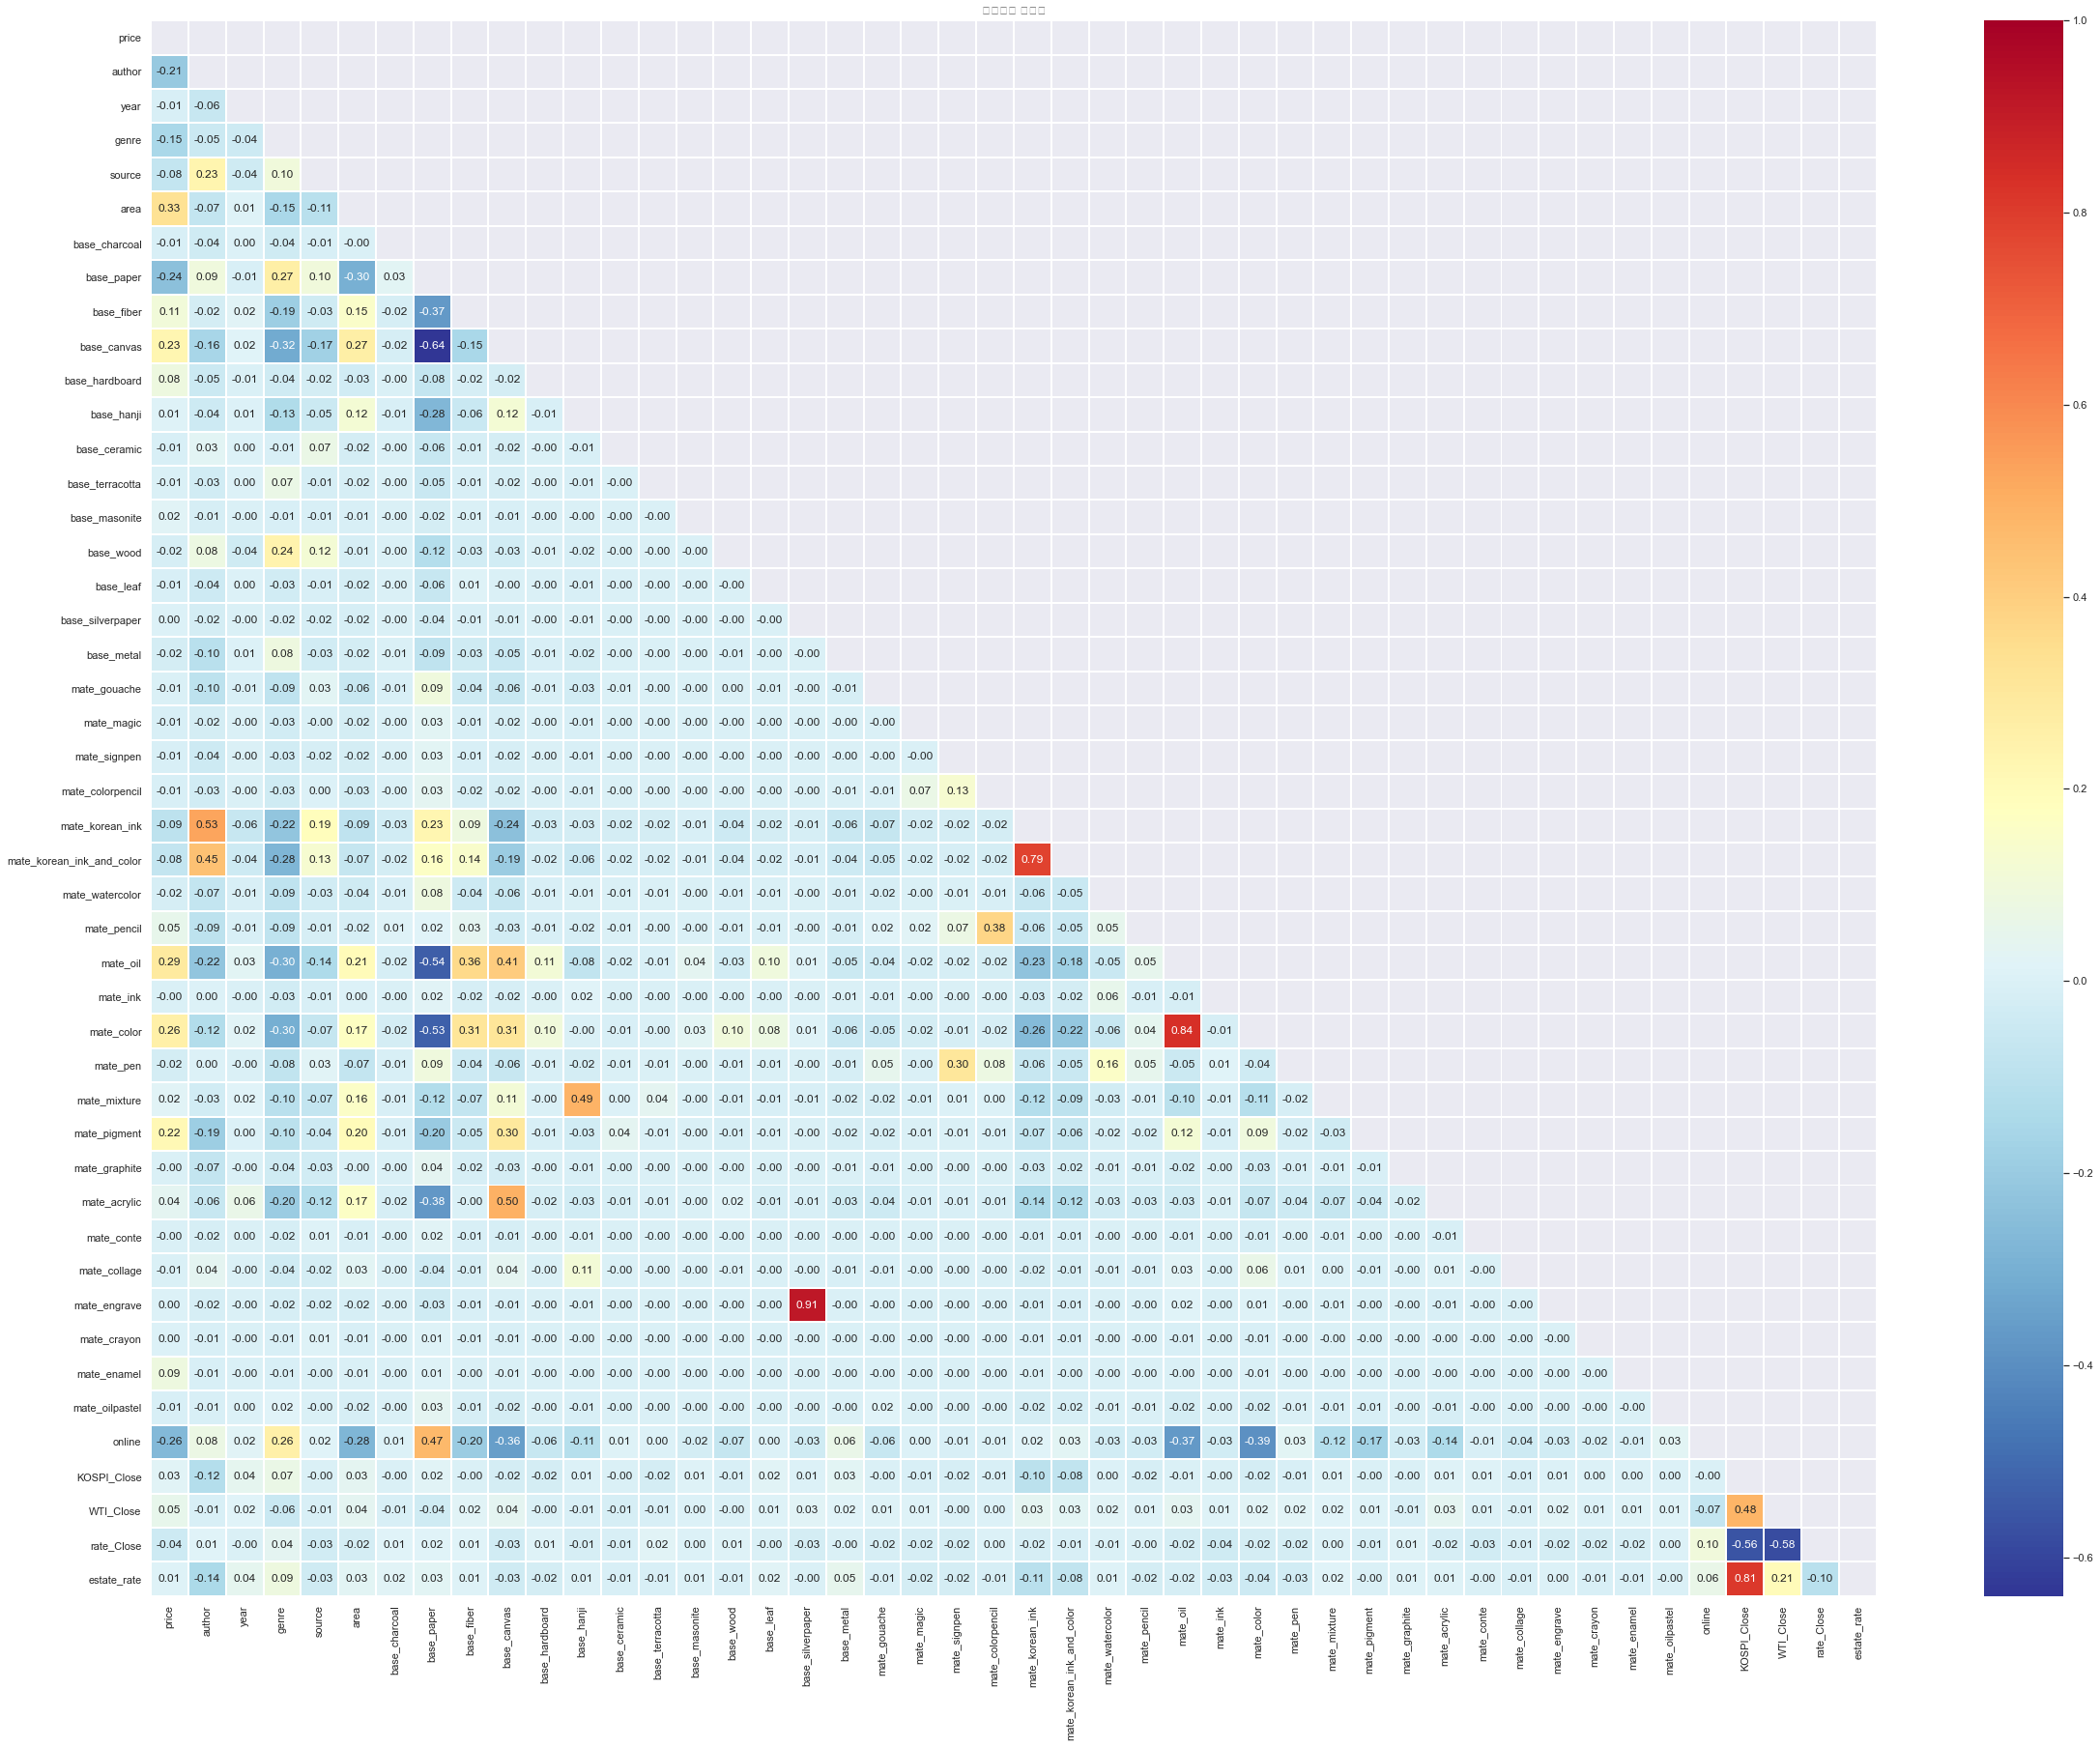

In [24]:
corr = df_corr.corr()

sns.set(rc = {'figure.figsize':(40,30)})

mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

In [25]:
corr.price.abs().sort_values(ascending=False)

price                        1.000000
area                         0.333111
mate_oil                     0.292644
online                       0.264897
mate_color                   0.258344
base_paper                   0.242120
base_canvas                  0.226971
mate_pigment                 0.215245
author                       0.208656
genre                        0.152829
base_fiber                   0.106339
mate_korean_ink              0.093430
mate_enamel                  0.088876
base_hardboard               0.084637
source                       0.076419
mate_korean_ink_and_color    0.075619
WTI_Close                    0.053580
mate_pencil                  0.052115
rate_Close                   0.043941
mate_acrylic                 0.035655
KOSPI_Close                  0.025002
mate_mixture                 0.023753
base_metal                   0.023517
mate_pen                     0.023281
base_masonite                0.022904
base_wood                    0.018370
mate_waterco

In [26]:
df_corr['price_scale'] = 0
max_val = max(df_corr['price'])
min_val = min(df_corr['price'])
df_corr['price_scale'] = (df_corr['price']-min_val)/(max_val-min_val)

In [27]:
from sklearn.preprocessing import MinMaxScaler

X = df_corr.drop(['price', 'price_scale'], axis=1)
y = df_corr['price_scale']

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
X_scale = min_max_scaler.transform(X)

# 모델링

분석 방법 : 회귀

분석 기법 : Linear Regression, Ridge, Lasso, Regression Tree, SVR, Random Forest

Train_test_set_split : train 7: test 3

cv = 5

random_seed = 42

## 전체 작가

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_linear_pred = reg.predict(X_test)
RMSE_linear = mean_squared_error(y_test, y_linear_pred)**0.5
RMSE_linear

0.026881977067907924

In [30]:
rdg = Ridge(alpha=0.01)
rdg.fit(X_train, y_train)
y_ridge_pred = rdg.predict(X_test)
RMSE_ridge = mean_squared_error(y_test, y_ridge_pred)**0.5
RMSE_ridge

0.02688259420349695

In [31]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)
RMSE_lasso = mean_squared_error(y_test, y_lasso_pred)**0.5
RMSE_lasso

0.028304905414568468

In [32]:
# from sklearn.svm import SVR

# sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)
# sv_regressor.fit(X_train, y_train)
# y_svr_pred = sv_regressor.predict(X_test)
# RMSE_svr = mean_squared_error(y_test, y_svr_pred)**0.5
# RMSE_svr

22.26331726160054

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
RMSE_rf = mean_squared_error(y_test, y_rf_pred)**0.5
RMSE_rf

0.01731618260358187

## 0. 김환기

In [89]:
df_author_0 = df_corr[df_corr['author']==0]
df_author_0['price_scale'] = 0
max_val = max(df_author_0['price'])
min_val = min(df_author_0['price'])
df_author_0['price_scale'] = (df_author_0['price']-min_val)/(max_val-min_val)

X_0 = df_author_0.drop(['price', 'price_scale'], axis=1)
y_0 = df_author_0['price_scale']

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_0))
print("평가용 데이터 길이 : ", len(X_test_0))
reg_0 = LinearRegression(n_jobs=-1).fit(X_train_0, y_train_0)
y_linear_pred_0 = reg_0.predict(X_test_0)
RMSE_linear_0 = mean_squared_error(y_test_0, y_linear_pred_0)**0.5
print("Linear Regression RMSE : ", RMSE_linear_0)

rdg_0 = Ridge(alpha=0.01)
rdg_0.fit(X_train_0, y_train_0)
y_ridge_pred_0 = rdg_0.predict(X_test_0)
RMSE_ridge_0 = mean_squared_error(y_test_0, y_ridge_pred_0)**0.5
print("Ridge RMSE : ", RMSE_ridge_0)

lasso_0 = Lasso(alpha=0.01)
lasso_0.fit(X_train_0, y_train_0)
y_lasso_pred_0 = lasso_0.predict(X_test_0)
RMSE_lasso_0 = mean_squared_error(y_test_0, y_lasso_pred_0)**0.5
print("Lasso RMSE : ", RMSE_lasso_0)

rf_0 = RandomForestRegressor()
rf_0.fit(X_train_0, y_train_0)
y_rf_pred_0 = rf_0.predict(X_test_0)
RMSE_rf_0 = mean_squared_error(y_test_0, y_rf_pred_0)**0.5
print("Random Forest RMSE : ", RMSE_rf_0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


훈련용 데이터 길이 :  291
평가용 데이터 길이 :  125
Linear Regression RMSE :  0.05002024626678419
Ridge RMSE :  0.050014524891932505
Lasso RMSE :  0.05818744158367096
Random Forest RMSE :  0.05193823534567262


## 이우환

In [90]:
df_author_1 = df_corr[df_corr['author']==1]
df_author_1['price_scale'] = 0
max_val = max(df_author_1['price'])
min_val = min(df_author_1['price'])
df_author_1['price_scale'] = (df_author_1['price']-min_val)/(max_val-min_val)

X_1 = df_author_1.drop(['price', 'price_scale'], axis=1)
y_1 = df_author_1['price_scale']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_1))
print("평가용 데이터 길이 : ", len(X_test_1))
reg_1 = LinearRegression(n_jobs=-1).fit(X_train_1, y_train_1)
y_linear_pred_1 = reg_1.predict(X_test_1)
RMSE_linear_1 = mean_squared_error(y_test_1, y_linear_pred_1)**0.5
print("Linear Regression RMSE : ", RMSE_linear_1)

rdg_1 = Ridge(alpha=0.01)
rdg_1.fit(X_train_1, y_train_1)
y_ridge_pred_1 = rdg_1.predict(X_test_1)
RMSE_ridge_1 = mean_squared_error(y_test_1, y_ridge_pred_1)**0.5
print("Ridge RMSE : ", RMSE_ridge_1)

lasso_1 = Lasso(alpha=0.01)
lasso_1.fit(X_train_1, y_train_1)
y_lasso_pred_1 = lasso_1.predict(X_test_1)
RMSE_lasso_1 = mean_squared_error(y_test_1, y_lasso_pred_1)**0.5
print("Lasso RMSE : ", RMSE_lasso_1)

rf_1 = RandomForestRegressor()
rf_1.fit(X_train_1, y_train_1)
y_rf_pred_1 = rf_1.predict(X_test_1)
RMSE_rf_1 = mean_squared_error(y_test_1, y_rf_pred_1)**0.5
print("Random Forest RMSE : ", RMSE_rf_1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


훈련용 데이터 길이 :  414
평가용 데이터 길이 :  178
Linear Regression RMSE :  0.06100594451951224
Ridge RMSE :  0.060975942712068396
Lasso RMSE :  0.0641152246413192
Random Forest RMSE :  0.034337877674006353


## 박서보

In [91]:
df_author_2 = df_corr[df_corr['author']==2]
df_author_2['price_scale'] = 0
max_val = max(df_author_2['price'])
min_val = min(df_author_2['price'])
df_author_2['price_scale'] = (df_author_2['price']-min_val)/(max_val-min_val)

X_2 = df_author_2.drop(['price', 'price_scale'], axis=1)
y_2 = df_author_2['price_scale']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_2))
print("평가용 데이터 길이 : ", len(X_test_2))
reg_2 = LinearRegression(n_jobs=-1).fit(X_train_2, y_train_2)
y_linear_pred_2 = reg_2.predict(X_test_2)
RMSE_linear_2 = mean_squared_error(y_test_2, y_linear_pred_2)**0.5
print("Linear Regression RMSE : ", RMSE_linear_2)

rdg_2 = Ridge(alpha=0.01)
rdg_2.fit(X_train_2, y_train_2)
y_ridge_pred_2 = rdg_2.predict(X_test_2)
RMSE_ridge_2 = mean_squared_error(y_test_2, y_ridge_pred_2)**0.5
print("Ridge RMSE : ", RMSE_ridge_2)

lasso_2 = Lasso(alpha=0.01)
lasso_2.fit(X_train_2, y_train_2)
y_lasso_pred_2 = lasso_2.predict(X_test_2)
RMSE_lasso_2 = mean_squared_error(y_test_2, y_lasso_pred_2)**0.5
print("Lasso RMSE : ", RMSE_lasso_2)

rf_2 = RandomForestRegressor()
rf_2.fit(X_train_2, y_train_2)
y_rf_pred_2 = rf_2.predict(X_test_2)
RMSE_rf_2 = mean_squared_error(y_test_2, y_rf_pred_2)**0.5
print("Random Forest RMSE : ", RMSE_rf_2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


훈련용 데이터 길이 :  178
평가용 데이터 길이 :  77
Linear Regression RMSE :  0.09932886540323642
Ridge RMSE :  0.09923807039555459
Lasso RMSE :  0.11064444086151194
Random Forest RMSE :  0.08596328500363774


## 정상화

In [92]:
df_author_3 = df_corr[df_corr['author']==3]
df_author_3['price_scale'] = 0
max_val = max(df_author_3['price'])
min_val = min(df_author_3['price'])
df_author_3['price_scale'] = (df_author_3['price']-min_val)/(max_val-min_val)

X_3 = df_author_3.drop(['price', 'price_scale'], axis=1)
y_3 = df_author_3['price_scale']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_3))
print("평가용 데이터 길이 : ", len(X_test_3))
reg_3 = LinearRegression(n_jobs=-1).fit(X_train_3, y_train_3)
y_linear_pred_3 = reg_3.predict(X_test_3)
RMSE_linear_3 = mean_squared_error(y_test_3, y_linear_pred_3)**0.5
print("Linear Regression RMSE : ", RMSE_linear_3)

rdg_3 = Ridge(alpha=0.01)
rdg_3.fit(X_train_3, y_train_3)
y_ridge_pred_3 = rdg_3.predict(X_test_3)
RMSE_ridge_3 = mean_squared_error(y_test_3, y_ridge_pred_3)**0.5
print("Ridge RMSE : ", RMSE_ridge_3)

lasso_3 = Lasso(alpha=0.01)
lasso_3.fit(X_train_3, y_train_3)
y_lasso_pred_3 = lasso_3.predict(X_test_3)
RMSE_lasso_3 = mean_squared_error(y_test_3, y_lasso_pred_3)**0.5
print("Lasso RMSE : ", RMSE_lasso_3)

rf_3 = RandomForestRegressor()
rf_3.fit(X_train_3, y_train_3)
y_rf_pred_3 = rf_3.predict(X_test_3)
RMSE_rf_3 = mean_squared_error(y_test_3, y_rf_pred_3)**0.5
print("Random Forest RMSE : ", RMSE_rf_3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


훈련용 데이터 길이 :  114
평가용 데이터 길이 :  50
Linear Regression RMSE :  0.07873584132026352
Ridge RMSE :  0.07843370068006747
Lasso RMSE :  0.07350158389114511
Random Forest RMSE :  0.067778488130211


## 김창열

In [93]:
df_author_4 = df_corr[df_corr['author']==4]
df_author_4['price_scale'] = 0
max_val = max(df_author_4['price'])
min_val = min(df_author_4['price'])
print(max_val, min_val)
df_author_4['price_scale'] = (df_author_4['price']-min_val)/(max_val-min_val)

X_4 = df_author_4.drop(['price', 'price_scale'], axis=1)
y_4 = df_author_4['price_scale']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_4))
print("평가용 데이터 길이 : ", len(X_test_4))
reg_4 = LinearRegression(n_jobs=-1).fit(X_train_4, y_train_4)
y_linear_pred_4 = reg_4.predict(X_test_4)
RMSE_linear_4 = mean_squared_error(y_test_4, y_linear_pred_4)**0.5
print("Linear Regression RMSE : ", RMSE_linear_4)

rdg_4 = Ridge(alpha=0.01)
rdg_4.fit(X_train_4, y_train_4)
y_ridge_pred_4 = rdg_4.predict(X_test_4)
RMSE_ridge_4 = mean_squared_error(y_test_4, y_ridge_pred_4)**0.5
print("Ridge RMSE : ", RMSE_ridge_4)

lasso_4 = Lasso(alpha=0.01)
lasso_4.fit(X_train_4, y_train_4)
y_lasso_pred_4 = lasso_4.predict(X_test_4)
RMSE_lasso_4 = mean_squared_error(y_test_4, y_lasso_pred_4)**0.5
print("Lasso RMSE : ", RMSE_lasso_4)

rf_4 = RandomForestRegressor()
rf_4.fit(X_train_4, y_train_4)
y_rf_pred_4 = rf_4.predict(X_test_4)
RMSE_rf_4 = mean_squared_error(y_test_4, y_rf_pred_4)**0.5
print("Random Forest RMSE : ", RMSE_rf_4)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1040000000 200000
훈련용 데이터 길이 :  431
평가용 데이터 길이 :  185
Linear Regression RMSE :  0.0580707500519546
Ridge RMSE :  0.05805780009440946
Lasso RMSE :  0.061423274280887064
Random Forest RMSE :  0.025039701277513933


## 박수근

In [94]:
df_author_5 = df_corr[df_corr['author']==5]
df_author_5['price_scale'] = 0
max_val = max(df_author_5['price'])
min_val = min(df_author_5['price'])
print(max_val, min_val)
df_author_5['price_scale'] = (df_author_5['price']-min_val)/(max_val-min_val)

X_5 = df_author_5.drop(['price', 'price_scale'], axis=1)
y_5 = df_author_5['price_scale']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_5))
print("평가용 데이터 길이 : ", len(X_test_5))
reg_5 = LinearRegression(n_jobs=-1).fit(X_train_5, y_train_5)
y_linear_pred_5 = reg_5.predict(X_test_5)
RMSE_linear_5 = mean_squared_error(y_test_5, y_linear_pred_5)**0.5
print("Linear Regression RMSE : ", RMSE_linear_5)

rdg_5 = Ridge(alpha=0.01)
rdg_5.fit(X_train_5, y_train_5)
y_ridge_pred_5 = rdg_5.predict(X_test_5)
RMSE_ridge_5 = mean_squared_error(y_test_5, y_ridge_pred_5)**0.5
print("Ridge RMSE : ", RMSE_ridge_5)

lasso_5 = Lasso(alpha=0.01)
lasso_5.fit(X_train_5, y_train_5)
y_lasso_pred_5 = lasso_5.predict(X_test_5)
RMSE_lasso_5 = mean_squared_error(y_test_5, y_lasso_pred_5)**0.5
print("Lasso RMSE : ", RMSE_lasso_5)

rf_5 = RandomForestRegressor()
rf_5.fit(X_train_5, y_train_5)
y_rf_pred_5 = rf_5.predict(X_test_5)
RMSE_rf_5 = mean_squared_error(y_test_5, y_rf_pred_5)**0.5
print("Random Forest RMSE : ", RMSE_rf_5)

1050000000 100000
훈련용 데이터 길이 :  104
평가용 데이터 길이 :  45
Linear Regression RMSE :  0.10589438066866821
Ridge RMSE :  0.10596036078647439
Lasso RMSE :  0.1179846228936757
Random Forest RMSE :  0.09526338156505977


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 천경자

In [95]:
df_author_6 = df_corr[df_corr['author']==6]
df_author_6['price_scale'] = 0
max_val = max(df_author_6['price'])
min_val = min(df_author_6['price'])
print(max_val, min_val)
df_author_6['price_scale'] = (df_author_6['price']-min_val)/(max_val-min_val)

X_6 = df_author_6.drop(['price', 'price_scale'], axis=1)
y_6 = df_author_6['price_scale']

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_6))
print("평가용 데이터 길이 : ", len(X_test_6))
reg_6 = LinearRegression(n_jobs=-1).fit(X_train_6, y_train_6)
y_linear_pred_6 = reg_6.predict(X_test_6)
RMSE_linear_6 = mean_squared_error(y_test_6, y_linear_pred_6)**0.5
print("Linear Regression RMSE : ", RMSE_linear_6)

rdg_6 = Ridge(alpha=0.01)
rdg_6.fit(X_train_6, y_train_6)
y_ridge_pred_6 = rdg_6.predict(X_test_6)
RMSE_ridge_6 = mean_squared_error(y_test_6, y_ridge_pred_6)**0.5
print("Ridge RMSE : ", RMSE_ridge_6)

lasso_6 = Lasso(alpha=0.01)
lasso_6.fit(X_train_6, y_train_6)
y_lasso_pred_6 = lasso_6.predict(X_test_6)
RMSE_lasso_6 = mean_squared_error(y_test_6, y_lasso_pred_6)**0.5
print("Lasso RMSE : ", RMSE_lasso_6)

rf_6 = RandomForestRegressor()
rf_6.fit(X_train_6, y_train_6)
y_rf_pred_6 = rf_6.predict(X_test_6)
RMSE_rf_6 = mean_squared_error(y_test_6, y_rf_pred_6)**0.5
print("Random Forest RMSE : ", RMSE_rf_6)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2000000000 100000
훈련용 데이터 길이 :  214
평가용 데이터 길이 :  93
Linear Regression RMSE :  0.059430462409948356
Ridge RMSE :  0.05940764500058048
Lasso RMSE :  0.06696879203227184
Random Forest RMSE :  0.058832801679154584


## 이중섭

In [96]:
df_author_7 = df_corr[df_corr['author']==7]
df_author_7['price_scale'] = 0
max_val = max(df_author_7['price'])
min_val = min(df_author_7['price'])
print(max_val, min_val)
df_author_7['price_scale'] = (df_author_7['price']-min_val)/(max_val-min_val)

X_7 = df_author_7.drop(['price', 'price_scale'], axis=1)
y_7 = df_author_7['price_scale']

X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_7))
print("평가용 데이터 길이 : ", len(X_test_7))
reg_7 = LinearRegression(n_jobs=-1).fit(X_train_7, y_train_7)
y_linear_pred_7 = reg_7.predict(X_test_7)
RMSE_linear_7 = mean_squared_error(y_test_7, y_linear_pred_7)**0.5
print("Linear Regression RMSE : ", RMSE_linear_7)

rdg_7 = Ridge(alpha=0.01)
rdg_7.fit(X_train_7, y_train_7)
y_ridge_pred_7 = rdg_7.predict(X_test_7)
RMSE_ridge_7 = mean_squared_error(y_test_7, y_ridge_pred_7)**0.5
print("Ridge RMSE : ", RMSE_ridge_7)

lasso_7 = Lasso(alpha=0.01)
lasso_7.fit(X_train_7, y_train_7)
y_lasso_pred_7 = lasso_7.predict(X_test_7)
RMSE_lasso_7 = mean_squared_error(y_test_7, y_lasso_pred_7)**0.5
print("Lasso RMSE : ", RMSE_lasso_7)

rf_7 = RandomForestRegressor()
rf_7.fit(X_train_7, y_train_7)
y_rf_pred_7 = rf_7.predict(X_test_7)
RMSE_rf_7 = mean_squared_error(y_test_7, y_rf_pred_7)**0.5
print("Random Forest RMSE : ", RMSE_rf_7)

4700000000 100000
훈련용 데이터 길이 :  26
평가용 데이터 길이 :  12
Linear Regression RMSE :  0.26332485658236304
Ridge RMSE :  0.26231863440997977
Lasso RMSE :  0.3141365701719261
Random Forest RMSE :  0.27746551039600936


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 윤형근

In [97]:
df_author_8 = df_corr[df_corr['author']==8]
df_author_8['price_scale'] = 0
max_val = max(df_author_8['price'])
min_val = min(df_author_8['price'])
print(max_val, min_val)
df_author_8['price_scale'] = (df_author_8['price']-min_val)/(max_val-min_val)

X_8 = df_author_8.drop(['price', 'price_scale'], axis=1)
y_8 = df_author_8['price_scale']

X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_8))
print("평가용 데이터 길이 : ", len(X_test_8))
reg_8 = LinearRegression(n_jobs=-1).fit(X_train_8, y_train_8)
y_linear_pred_8 = reg_8.predict(X_test_8)
RMSE_linear_8 = mean_squared_error(y_test_8, y_linear_pred_8)**0.5
print("Linear Regression RMSE : ", RMSE_linear_8)

rdg_8 = Ridge(alpha=0.01)
rdg_8.fit(X_train_8, y_train_8)
y_ridge_pred_8 = rdg_8.predict(X_test_8)
RMSE_ridge_8 = mean_squared_error(y_test_8, y_ridge_pred_8)**0.5
print("Ridge RMSE : ", RMSE_ridge_8)

lasso_8 = Lasso(alpha=0.01)
lasso_8.fit(X_train_8, y_train_8)
y_lasso_pred_8 = lasso_8.predict(X_test_8)
RMSE_lasso_8 = mean_squared_error(y_test_8, y_lasso_pred_8)**0.5
print("Lasso RMSE : ", RMSE_lasso_8)

rf_8 = RandomForestRegressor()
rf_8.fit(X_train_8, y_train_8)
y_rf_pred_8 = rf_8.predict(X_test_8)
RMSE_rf_8 = mean_squared_error(y_test_8, y_rf_pred_8)**0.5
print("Random Forest RMSE : ", RMSE_rf_8)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


335000000 1000000
훈련용 데이터 길이 :  102
평가용 데이터 길이 :  45
Linear Regression RMSE :  0.14340704507821003
Ridge RMSE :  0.14341330590451773
Lasso RMSE :  0.15717714294685614
Random Forest RMSE :  0.11928627213178332


## 이대원

In [98]:
df_author_9 = df_corr[df_corr['author']==9]
df_author_9['price_scale'] = 0
max_val = max(df_author_9['price'])
min_val = min(df_author_9['price'])
print(max_val, min_val)
df_author_9['price_scale'] = (df_author_9['price']-min_val)/(max_val-min_val)

X_9 = df_author_9.drop(['price', 'price_scale'], axis=1)
y_9 = df_author_9['price_scale']

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_9))
print("평가용 데이터 길이 : ", len(X_test_9))
reg_9 = LinearRegression(n_jobs=-1).fit(X_train_9, y_train_9)
y_linear_pred_9 = reg_9.predict(X_test_9)
RMSE_linear_9 = mean_squared_error(y_test_9, y_linear_pred_9)**0.5
print("Linear Regression RMSE : ", RMSE_linear_9)

rdg_9 = Ridge(alpha=0.01)
rdg_9.fit(X_train_9, y_train_9)
y_ridge_pred_9 = rdg_9.predict(X_test_9)
RMSE_ridge_9 = mean_squared_error(y_test_9, y_ridge_pred_9)**0.5
print("Ridge RMSE : ", RMSE_ridge_9)

lasso_9 = Lasso(alpha=0.01)
lasso_9.fit(X_train_9, y_train_9)
y_lasso_pred_9 = lasso_9.predict(X_test_9)
RMSE_lasso_9 = mean_squared_error(y_test_9, y_lasso_pred_9)**0.5
print("Lasso RMSE : ", RMSE_lasso_9)

rf_9 = RandomForestRegressor()
rf_9.fit(X_train_9, y_train_9)
y_rf_pred_9 = rf_9.predict(X_test_9)
RMSE_rf_9 = mean_squared_error(y_test_9, y_rf_pred_9)**0.5
print("Random Forest RMSE : ", RMSE_rf_9)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


500000000 70000
훈련용 데이터 길이 :  306
평가용 데이터 길이 :  132
Linear Regression RMSE :  0.042435453015160114
Ridge RMSE :  0.042435314101896424
Lasso RMSE :  0.053357137838317005
Random Forest RMSE :  0.026086251388564585


## 유영국

In [99]:
df_author_10 = df_corr[df_corr['author']==10]
df_author_10['price_scale'] = 0
max_val = max(df_author_10['price'])
min_val = min(df_author_10['price'])
print(max_val, min_val)
df_author_10['price_scale'] = (df_author_10['price']-min_val)/(max_val-min_val)

X_10 = df_author_10.drop(['price', 'price_scale'], axis=1)
y_10 = df_author_10['price_scale']

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_10))
print("평가용 데이터 길이 : ", len(X_test_10))
reg_10 = LinearRegression(n_jobs=-1).fit(X_train_10, y_train_10)
y_linear_pred_10 = reg_10.predict(X_test_10)
RMSE_linear_10 = mean_squared_error(y_test_10, y_linear_pred_10)**0.5
print("Linear Regression RMSE : ", RMSE_linear_10)

rdg_10 = Ridge(alpha=0.01)
rdg_10.fit(X_train_10, y_train_10)
y_ridge_pred_10 = rdg_10.predict(X_test_10)
RMSE_ridge_10 = mean_squared_error(y_test_10, y_ridge_pred_10)**0.5
print("Ridge RMSE : ", RMSE_ridge_10)

lasso_10 = Lasso(alpha=0.01)
lasso_10.fit(X_train_10, y_train_10)
y_lasso_pred_10 = lasso_10.predict(X_test_10)
RMSE_lasso_10 = mean_squared_error(y_test_10, y_lasso_pred_10)**0.5
print("Lasso RMSE : ", RMSE_lasso_10)

rf_10 = RandomForestRegressor()
rf_10.fit(X_train_10, y_train_10)
y_rf_pred_10 = rf_10.predict(X_test_10)
RMSE_rf_10 = mean_squared_error(y_test_10, y_rf_pred_10)**0.5
print("Random Forest RMSE : ", RMSE_rf_10)

1270000000 100000
훈련용 데이터 길이 :  84
평가용 데이터 길이 :  36
Linear Regression RMSE :  0.09838666652844708
Ridge RMSE :  0.09838489633328193
Lasso RMSE :  0.10041600743009726
Random Forest RMSE :  0.10532070313680347


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 장욱진

In [100]:
df_author_11 = df_corr[df_corr['author']==11]
df_author_11['price_scale'] = 0
max_val = max(df_author_11['price'])
min_val = min(df_author_11['price'])
print(max_val, min_val)
df_author_11['price_scale'] = (df_author_11['price']-min_val)/(max_val-min_val)

X_11 = df_author_11.drop(['price', 'price_scale'], axis=1)
y_11 = df_author_11['price_scale']

X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_11, y_11, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_11))
print("평가용 데이터 길이 : ", len(X_test_11))
reg_11 = LinearRegression(n_jobs=-1).fit(X_train_11, y_train_11)
y_linear_pred_11 = reg_11.predict(X_test_11)
RMSE_linear_11 = mean_squared_error(y_test_11, y_linear_pred_11)**0.5
print("Linear Regression RMSE : ", RMSE_linear_11)

rdg_11 = Ridge(alpha=0.01)
rdg_11.fit(X_train_11, y_train_11)
y_ridge_pred_11 = rdg_11.predict(X_test_11)
RMSE_ridge_11 = mean_squared_error(y_test_11, y_ridge_pred_11)**0.5
print("Ridge RMSE : ", RMSE_ridge_11)

lasso_11 = Lasso(alpha=0.01)
lasso_11.fit(X_train_11, y_train_11)
y_lasso_pred_11 = lasso_11.predict(X_test_11)
RMSE_lasso_11 = mean_squared_error(y_test_11, y_lasso_pred_11)**0.5
print("Lasso RMSE : ", RMSE_lasso_11)

rf_11 = RandomForestRegressor()
rf_11.fit(X_train_11, y_train_11)
y_rf_pred_11 = rf_11.predict(X_test_11)
RMSE_rf_11 = mean_squared_error(y_test_11, y_rf_pred_11)**0.5
print("Random Forest RMSE : ", RMSE_rf_11)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


700000000 80000
훈련용 데이터 길이 :  142
평가용 데이터 길이 :  62
Linear Regression RMSE :  0.049149481604394356
Ridge RMSE :  0.04908047829843528
Lasso RMSE :  0.049047608296065616
Random Forest RMSE :  0.015780339052596043


## 12. 김종학

In [101]:
df_author_12 = df_corr[df_corr['author']==12]
df_author_12['price_scale'] = 0
max_val = max(df_author_12['price'])
min_val = min(df_author_12['price'])
print(max_val, min_val)
df_author_12['price_scale'] = (df_author_12['price']-min_val)/(max_val-min_val)

X_12 = df_author_12.drop(['price', 'price_scale'], axis=1)
y_12 = df_author_12['price_scale']

X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X_12, y_12, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_12))
print("평가용 데이터 길이 : ", len(X_test_12))
reg_12 = LinearRegression(n_jobs=-1).fit(X_train_12, y_train_12)
y_linear_pred_12 = reg_12.predict(X_test_12)
RMSE_linear_12 = mean_squared_error(y_test_12, y_linear_pred_12)**0.5
print("Linear Regression RMSE : ", RMSE_linear_12)

rdg_12 = Ridge(alpha=0.01)
rdg_12.fit(X_train_12, y_train_12)
y_ridge_pred_12 = rdg_12.predict(X_test_12)
RMSE_ridge_12 = mean_squared_error(y_test_12, y_ridge_pred_12)**0.5
print("Ridge RMSE : ", RMSE_ridge_12)

lasso_12 = Lasso(alpha=0.01)
lasso_12.fit(X_train_12, y_train_12)
y_lasso_pred_12 = lasso_12.predict(X_test_12)
RMSE_lasso_12 = mean_squared_error(y_test_12, y_lasso_pred_12)**0.5
print("Lasso RMSE : ", RMSE_lasso_12)

rf_12 = RandomForestRegressor()
rf_12.fit(X_train_12, y_train_12)
y_rf_pred_12 = rf_12.predict(X_test_12)
RMSE_rf_12 = mean_squared_error(y_test_12, y_rf_pred_12)**0.5
print("Random Forest RMSE : ", RMSE_rf_12)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


320000000 100000
훈련용 데이터 길이 :  319
평가용 데이터 길이 :  137
Linear Regression RMSE :  0.04546722919265686
Ridge RMSE :  0.04546450152035277
Lasso RMSE :  0.05483102282095598
Random Forest RMSE :  0.037678583169716576


## 13. 백남준

In [102]:
df_author_13 = df_corr[df_corr['author']==13]
df_author_13['price_scale'] = 0
max_val = max(df_author_13['price'])
min_val = min(df_author_13['price'])
print(max_val, min_val)
df_author_13['price_scale'] = (df_author_13['price']-min_val)/(max_val-min_val)

X_13 = df_author_13.drop(['price', 'price_scale'], axis=1)
y_13 = df_author_13['price_scale']

X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_13))
print("평가용 데이터 길이 : ", len(X_test_13))
reg_13 = LinearRegression(n_jobs=-1).fit(X_train_13, y_train_13)
y_linear_pred_13 = reg_13.predict(X_test_13)
RMSE_linear_13 = mean_squared_error(y_test_13, y_linear_pred_13)**0.5
print("Linear Regression RMSE : ", RMSE_linear_13)

rdg_13 = Ridge(alpha=0.01)
rdg_13.fit(X_train_13, y_train_13)
y_ridge_pred_13 = rdg_13.predict(X_test_13)
RMSE_ridge_13 = mean_squared_error(y_test_13, y_ridge_pred_13)**0.5
print("Ridge RMSE : ", RMSE_ridge_13)

lasso_13 = Lasso(alpha=0.01)
lasso_13.fit(X_train_13, y_train_13)
y_lasso_pred_13 = lasso_13.predict(X_test_13)
RMSE_lasso_13 = mean_squared_error(y_test_13, y_lasso_pred_13)**0.5
print("Lasso RMSE : ", RMSE_lasso_13)

rf_13 = RandomForestRegressor()
rf_13.fit(X_train_13, y_train_13)
y_rf_pred_13 = rf_13.predict(X_test_13)
RMSE_rf_13 = mean_squared_error(y_test_13, y_rf_pred_13)**0.5
print("Random Forest RMSE : ", RMSE_rf_13)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


300000000 150000
훈련용 데이터 길이 :  152
평가용 데이터 길이 :  66
Linear Regression RMSE :  0.0538322880892046
Ridge RMSE :  0.053711192309172096
Lasso RMSE :  0.051376632986128955
Random Forest RMSE :  0.03815663757388139


## 14. 오치균

In [103]:
df_author_14 = df_corr[df_corr['author']==14]
df_author_14['price_scale'] = 0
max_val = max(df_author_14['price'])
min_val = min(df_author_14['price'])
print(max_val, min_val)
df_author_14['price_scale'] = (df_author_14['price']-min_val)/(max_val-min_val)

X_14 = df_author_14.drop(['price', 'price_scale'], axis=1)
y_14 = df_author_14['price_scale']

X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(X_14, y_14, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_14))
print("평가용 데이터 길이 : ", len(X_test_14))
reg_14 = LinearRegression(n_jobs=-1).fit(X_train_14, y_train_14)
y_linear_pred_14 = reg_14.predict(X_test_14)
RMSE_linear_14 = mean_squared_error(y_test_14, y_linear_pred_14)**0.5
print("Linear Regression RMSE : ", RMSE_linear_14)

rdg_14 = Ridge(alpha=0.01)
rdg_14.fit(X_train_14, y_train_14)
y_ridge_pred_14 = rdg_14.predict(X_test_14)
RMSE_ridge_14 = mean_squared_error(y_test_14, y_ridge_pred_14)**0.5
print("Ridge RMSE : ", RMSE_ridge_14)

lasso_14 = Lasso(alpha=0.01)
lasso_14.fit(X_train_14, y_train_14)
y_lasso_pred_14 = lasso_14.predict(X_test_14)
RMSE_lasso_14 = mean_squared_error(y_test_14, y_lasso_pred_14)**0.5
print("Lasso RMSE : ", RMSE_lasso_14)

rf_14 = RandomForestRegressor()
rf_14.fit(X_train_14, y_train_14)
y_rf_pred_14 = rf_14.predict(X_test_14)
RMSE_rf_14 = mean_squared_error(y_test_14, y_rf_pred_14)**0.5
print("Random Forest RMSE : ", RMSE_rf_14)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


280000000 260000
훈련용 데이터 길이 :  126
평가용 데이터 길이 :  54
Linear Regression RMSE :  0.05079257972820867
Ridge RMSE :  0.050782722382818134
Lasso RMSE :  0.05627170943628788
Random Forest RMSE :  0.06047789018036413


## 15. 하종현

In [104]:
df_author_15 = df_corr[df_corr['author']==15]
df_author_15['price_scale'] = 0
max_val = max(df_author_15['price'])
min_val = min(df_author_15['price'])
print(max_val, min_val)
df_author_15['price_scale'] = (df_author_15['price']-min_val)/(max_val-min_val)

X_15 = df_author_15.drop(['price', 'price_scale'], axis=1)
y_15 = df_author_15['price_scale']

X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_15))
print("평가용 데이터 길이 : ", len(X_test_15))
reg_15 = LinearRegression(n_jobs=-1).fit(X_train_15, y_train_15)
y_linear_pred_15 = reg_15.predict(X_test_15)
RMSE_linear_15 = mean_squared_error(y_test_15, y_linear_pred_15)**0.5
print("Linear Regression RMSE : ", RMSE_linear_15)

rdg_15 = Ridge(alpha=0.01)
rdg_15.fit(X_train_15, y_train_15)
y_ridge_pred_15 = rdg_15.predict(X_test_15)
RMSE_ridge_15 = mean_squared_error(y_test_15, y_ridge_pred_15)**0.5
print("Ridge RMSE : ", RMSE_ridge_15)

lasso_15 = Lasso(alpha=0.01)
lasso_15.fit(X_train_15, y_train_15)
y_lasso_pred_15 = lasso_15.predict(X_test_15)
RMSE_lasso_15 = mean_squared_error(y_test_15, y_lasso_pred_15)**0.5
print("Lasso RMSE : ", RMSE_lasso_15)

rf_15 = RandomForestRegressor()
rf_15.fit(X_train_15, y_train_15)
y_rf_pred_15 = rf_15.predict(X_test_15)
RMSE_rf_15 = mean_squared_error(y_test_15, y_rf_pred_15)**0.5
print("Random Forest RMSE : ", RMSE_rf_15)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


185000000 350000
훈련용 데이터 길이 :  37
평가용 데이터 길이 :  17
Linear Regression RMSE :  0.16832851093598797
Ridge RMSE :  0.16821681807151118
Lasso RMSE :  0.16797808295027525
Random Forest RMSE :  0.19019632901277092


## 16. 도상봉

In [105]:
df_author_16 = df_corr[df_corr['author']==16]
df_author_16['price_scale'] = 0
max_val = max(df_author_16['price'])
min_val = min(df_author_16['price'])
print(max_val, min_val)
df_author_16['price_scale'] = (df_author_16['price']-min_val)/(max_val-min_val)

X_16 = df_author_16.drop(['price', 'price_scale'], axis=1)
y_16 = df_author_16['price_scale']

X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_16))
print("평가용 데이터 길이 : ", len(X_test_16))
reg_16 = LinearRegression(n_jobs=-1).fit(X_train_16, y_train_16)
y_linear_pred_16 = reg_16.predict(X_test_16)
RMSE_linear_16 = mean_squared_error(y_test_16, y_linear_pred_16)**0.5
print("Linear Regression RMSE : ", RMSE_linear_16)

rdg_16 = Ridge(alpha=0.01)
rdg_16.fit(X_train_16, y_train_16)
y_ridge_pred_16 = rdg_16.predict(X_test_16)
RMSE_ridge_16 = mean_squared_error(y_test_16, y_ridge_pred_16)**0.5
print("Ridge RMSE : ", RMSE_ridge_16)

lasso_16 = Lasso(alpha=0.01)
lasso_16.fit(X_train_16, y_train_16)
y_lasso_pred_16 = lasso_16.predict(X_test_16)
RMSE_lasso_16 = mean_squared_error(y_test_16, y_lasso_pred_16)**0.5
print("Lasso RMSE : ", RMSE_lasso_16)

rf_16 = RandomForestRegressor()
rf_16.fit(X_train_16, y_train_16)
y_rf_pred_16 = rf_16.predict(X_test_16)
RMSE_rf_16 = mean_squared_error(y_test_16, y_rf_pred_16)**0.5
print("Random Forest RMSE : ", RMSE_rf_16)

700000000 23000000
훈련용 데이터 길이 :  30
평가용 데이터 길이 :  13
Linear Regression RMSE :  0.18386840072177613
Ridge RMSE :  0.18384943296021297
Lasso RMSE :  0.1829181166696923
Random Forest RMSE :  0.21877513354721173


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 17. 이강소

In [106]:
df_author_17 = df_corr[df_corr['author']==17]
df_author_17['price_scale'] = 0
max_val = max(df_author_17['price'])
min_val = min(df_author_17['price'])
print(max_val, min_val)
df_author_17['price_scale'] = (df_author_17['price']-min_val)/(max_val-min_val)

X_17 = df_author_17.drop(['price', 'price_scale'], axis=1)
y_17 = df_author_17['price_scale']

X_train_17, X_test_17, y_train_17, y_test_17 = train_test_split(X_17, y_17, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_17))
print("평가용 데이터 길이 : ", len(X_test_17))
reg_17 = LinearRegression(n_jobs=-1).fit(X_train_17, y_train_17)
y_linear_pred_17 = reg_17.predict(X_test_17)
RMSE_linear_17 = mean_squared_error(y_test_17, y_linear_pred_17)**0.5
print("Linear Regression RMSE : ", RMSE_linear_17)

rdg_17 = Ridge(alpha=0.01)
rdg_17.fit(X_train_17, y_train_17)
y_ridge_pred_17 = rdg_17.predict(X_test_17)
RMSE_ridge_17 = mean_squared_error(y_test_17, y_ridge_pred_17)**0.5
print("Ridge RMSE : ", RMSE_ridge_17)

lasso_17 = Lasso(alpha=0.01)
lasso_17.fit(X_train_17, y_train_17)
y_lasso_pred_17 = lasso_17.predict(X_test_17)
RMSE_lasso_17 = mean_squared_error(y_test_17, y_lasso_pred_17)**0.5
print("Lasso RMSE : ", RMSE_lasso_17)

rf_17 = RandomForestRegressor()
rf_17.fit(X_train_17, y_train_17)
y_rf_pred_17 = rf_17.predict(X_test_17)
RMSE_rf_17 = mean_squared_error(y_test_17, y_rf_pred_17)**0.5
print("Random Forest RMSE : ", RMSE_rf_17)

132000000 240000
훈련용 데이터 길이 :  86
평가용 데이터 길이 :  37
Linear Regression RMSE :  0.0748239826409376
Ridge RMSE :  0.07473505683378166
Lasso RMSE :  0.09681608230595758
Random Forest RMSE :  0.08100988550154743


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 18. 이왈종

In [107]:
df_author_18 = df_corr[df_corr['author']==18]
df_author_18['price_scale'] = 0
max_val = max(df_author_18['price'])
min_val = min(df_author_18['price'])
print(max_val, min_val)
df_author_18['price_scale'] = (df_author_18['price']-min_val)/(max_val-min_val)

X_18 = df_author_18.drop(['price', 'price_scale'], axis=1)
y_18 = df_author_18['price_scale']

X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(X_18, y_18, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_18))
print("평가용 데이터 길이 : ", len(X_test_18))
reg_18 = LinearRegression(n_jobs=-1).fit(X_train_18, y_train_18)
y_linear_pred_18 = reg_18.predict(X_test_18)
RMSE_linear_18 = mean_squared_error(y_test_18, y_linear_pred_18)**0.5
print("Linear Regression RMSE : ", RMSE_linear_18)

rdg_18 = Ridge(alpha=0.01)
rdg_18.fit(X_train_18, y_train_18)
y_ridge_pred_18 = rdg_18.predict(X_test_18)
RMSE_ridge_18 = mean_squared_error(y_test_18, y_ridge_pred_18)**0.5
print("Ridge RMSE : ", RMSE_ridge_18)

lasso_18 = Lasso(alpha=0.01)
lasso_18.fit(X_train_18, y_train_18)
y_lasso_pred_18 = lasso_18.predict(X_test_18)
RMSE_lasso_18 = mean_squared_error(y_test_18, y_lasso_pred_18)**0.5
print("Lasso RMSE : ", RMSE_lasso_18)

rf_18 = RandomForestRegressor()
rf_18.fit(X_train_18, y_train_18)
y_rf_pred_18 = rf_18.predict(X_test_18)
RMSE_rf_18 = mean_squared_error(y_test_18, y_rf_pred_18)**0.5
print("Random Forest RMSE : ", RMSE_rf_18)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


180000000 50000
훈련용 데이터 길이 :  456
평가용 데이터 길이 :  196
Linear Regression RMSE :  0.037427044570481634
Ridge RMSE :  0.03744031603848634
Lasso RMSE :  0.05208673938422746
Random Forest RMSE :  0.037865131014719194


## 19. 정선

In [108]:
df_author_19 = df_corr[df_corr['author']==19]
df_author_19['price_scale'] = 0
max_val = max(df_author_19['price'])
min_val = min(df_author_19['price'])
print(max_val, min_val)
df_author_19['price_scale'] = (df_author_19['price']-min_val)/(max_val-min_val)

X_19 = df_author_19.drop(['price', 'price_scale'], axis=1)
y_19 = df_author_19['price_scale']

X_train_19, X_test_19, y_train_19, y_test_19 = train_test_split(X_19, y_19, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_19))
print("평가용 데이터 길이 : ", len(X_test_19))
reg_19 = LinearRegression(n_jobs=-1).fit(X_train_19, y_train_19)
y_linear_pred_19 = reg_19.predict(X_test_19)
RMSE_linear_19 = mean_squared_error(y_test_19, y_linear_pred_19)**0.5
print("Linear Regression RMSE : ", RMSE_linear_19)

rdg_19 = Ridge(alpha=0.01)
rdg_19.fit(X_train_19, y_train_19)
y_ridge_pred_19 = rdg_19.predict(X_test_19)
RMSE_ridge_19 = mean_squared_error(y_test_19, y_ridge_pred_19)**0.5
print("Ridge RMSE : ", RMSE_ridge_19)

lasso_19 = Lasso(alpha=0.01)
lasso_19.fit(X_train_19, y_train_19)
y_lasso_pred_19 = lasso_19.predict(X_test_19)
RMSE_lasso_19 = mean_squared_error(y_test_19, y_lasso_pred_19)**0.5
print("Lasso RMSE : ", RMSE_lasso_19)

rf_19 = RandomForestRegressor()
rf_19.fit(X_train_19, y_train_19)
y_rf_pred_19 = rf_19.predict(X_test_19)
RMSE_rf_19 = mean_squared_error(y_test_19, y_rf_pred_19)**0.5
print("Random Forest RMSE : ", RMSE_rf_19)

440000000 650000
훈련용 데이터 길이 :  26
평가용 데이터 길이 :  12
Linear Regression RMSE :  0.318857281478361
Ridge RMSE :  0.3186797368546966
Lasso RMSE :  0.29145751199777253
Random Forest RMSE :  0.21535979760382695


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 20. 김홍도

In [109]:
df_author_20 = df_corr[df_corr['author']==20]
df_author_20['price_scale'] = 0
max_val = max(df_author_20['price'])
min_val = min(df_author_20['price'])
print(max_val, min_val)
df_author_20['price_scale'] = (df_author_20['price']-min_val)/(max_val-min_val)

X_20 = df_author_20.drop(['price', 'price_scale'], axis=1)
y_20 = df_author_20['price_scale']

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_20))
print("평가용 데이터 길이 : ", len(X_test_20))
reg_20 = LinearRegression(n_jobs=-1).fit(X_train_20, y_train_20)
y_linear_pred_20 = reg_20.predict(X_test_20)
RMSE_linear_20 = mean_squared_error(y_test_20, y_linear_pred_20)**0.5
print("Linear Regression RMSE : ", RMSE_linear_20)

rdg_20 = Ridge(alpha=0.01)
rdg_20.fit(X_train_20, y_train_20)
y_ridge_pred_20 = rdg_20.predict(X_test_20)
RMSE_ridge_20 = mean_squared_error(y_test_20, y_ridge_pred_20)**0.5
print("Ridge RMSE : ", RMSE_ridge_20)

lasso_20 = Lasso(alpha=0.01)
lasso_20.fit(X_train_20, y_train_20)
y_lasso_pred_20 = lasso_20.predict(X_test_20)
RMSE_lasso_20 = mean_squared_error(y_test_20, y_lasso_pred_20)**0.5
print("Lasso RMSE : ", RMSE_lasso_20)

rf_20 = RandomForestRegressor()
rf_20.fit(X_train_20, y_train_20)
y_rf_pred_20 = rf_20.predict(X_test_20)
RMSE_rf_20 = mean_squared_error(y_test_20, y_rf_pred_20)**0.5
print("Random Forest RMSE : ", RMSE_rf_20)

490000000 10000000
훈련용 데이터 길이 :  20
평가용 데이터 길이 :  9
Linear Regression RMSE :  0.37436920679963487
Ridge RMSE :  0.3703587191554174
Lasso RMSE :  0.24151042687834878
Random Forest RMSE :  0.20476800276438448


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 21. 김태호

In [110]:
df_author_21 = df_corr[df_corr['author']==21]
df_author_21['price_scale'] = 0
max_val = max(df_author_21['price'])
min_val = min(df_author_21['price'])
print(max_val, min_val)
df_author_21['price_scale'] = (df_author_21['price']-min_val)/(max_val-min_val)

X_21 = df_author_21.drop(['price', 'price_scale'], axis=1)
y_21 = df_author_21['price_scale']

X_train_21, X_test_21, y_train_21, y_test_21 = train_test_split(X_21, y_21, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_21))
print("평가용 데이터 길이 : ", len(X_test_21))
reg_21 = LinearRegression(n_jobs=-1).fit(X_train_21, y_train_21)
y_linear_pred_21 = reg_21.predict(X_test_21)
RMSE_linear_21 = mean_squared_error(y_test_21, y_linear_pred_21)**0.5
print("Linear Regression RMSE : ", RMSE_linear_21)

rdg_21 = Ridge(alpha=0.01)
rdg_21.fit(X_train_21, y_train_21)
y_ridge_pred_21 = rdg_21.predict(X_test_21)
RMSE_ridge_21 = mean_squared_error(y_test_21, y_ridge_pred_21)**0.5
print("Ridge RMSE : ", RMSE_ridge_21)

lasso_21 = Lasso(alpha=0.01)
lasso_21.fit(X_train_21, y_train_21)
y_lasso_pred_21 = lasso_21.predict(X_test_21)
RMSE_lasso_21 = mean_squared_error(y_test_21, y_lasso_pred_21)**0.5
print("Lasso RMSE : ", RMSE_lasso_21)

rf_21 = RandomForestRegressor()
rf_21.fit(X_train_21, y_train_21)
y_rf_pred_21 = rf_21.predict(X_test_21)
RMSE_rf_21 = mean_squared_error(y_test_21, y_rf_pred_21)**0.5
print("Random Forest RMSE : ", RMSE_rf_21)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


210000000 100000
훈련용 데이터 길이 :  95
평가용 데이터 길이 :  41
Linear Regression RMSE :  0.0807276694241817
Ridge RMSE :  0.08072129315656032
Lasso RMSE :  0.0768481657819836
Random Forest RMSE :  0.0763582213760071


## 22. 이상범

In [111]:
df_author_22 = df_corr[df_corr['author']==22]
df_author_22['price_scale'] = 0
max_val = max(df_author_22['price'])
min_val = min(df_author_22['price'])
print(max_val, min_val)
df_author_22['price_scale'] = (df_author_22['price']-min_val)/(max_val-min_val)

X_22 = df_author_22.drop(['price', 'price_scale'], axis=1)
y_22 = df_author_22['price_scale']

X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(X_22, y_22, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_22))
print("평가용 데이터 길이 : ", len(X_test_22))
reg_22 = LinearRegression(n_jobs=-1).fit(X_train_22, y_train_22)
y_linear_pred_22 = reg_22.predict(X_test_22)
RMSE_linear_22 = mean_squared_error(y_test_22, y_linear_pred_22)**0.5
print("Linear Regression RMSE : ", RMSE_linear_22)

rdg_22 = Ridge(alpha=0.01)
rdg_22.fit(X_train_22, y_train_22)
y_ridge_pred_22 = rdg_22.predict(X_test_22)
RMSE_ridge_22 = mean_squared_error(y_test_22, y_ridge_pred_22)**0.5
print("Ridge RMSE : ", RMSE_ridge_22)

lasso_22 = Lasso(alpha=0.01)
lasso_22.fit(X_train_22, y_train_22)
y_lasso_pred_22 = lasso_22.predict(X_test_22)
RMSE_lasso_22 = mean_squared_error(y_test_22, y_lasso_pred_22)**0.5
print("Lasso RMSE : ", RMSE_lasso_22)

rf_22 = RandomForestRegressor()
rf_22.fit(X_train_22, y_train_22)
y_rf_pred_22 = rf_22.predict(X_test_22)
RMSE_rf_22 = mean_squared_error(y_test_22, y_rf_pred_22)**0.5
print("Random Forest RMSE : ", RMSE_rf_22)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


420000000 100000
훈련용 데이터 길이 :  216
평가용 데이터 길이 :  93
Linear Regression RMSE :  0.06577323359294067
Ridge RMSE :  0.06577240916755529
Lasso RMSE :  0.06607174539976629
Random Forest RMSE :  0.08478288052222838


## 23. 남관

In [112]:
df_author_23 = df_corr[df_corr['author']==23]
df_author_23['price_scale'] = 0
max_val = max(df_author_23['price'])
min_val = min(df_author_23['price'])
print(max_val, min_val)
df_author_23['price_scale'] = (df_author_23['price']-min_val)/(max_val-min_val)

X_23 = df_author_23.drop(['price', 'price_scale'], axis=1)
y_23 = df_author_23['price_scale']

X_train_23, X_test_23, y_train_23, y_test_23 = train_test_split(X_23, y_23, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_23))
print("평가용 데이터 길이 : ", len(X_test_23))
reg_23 = LinearRegression(n_jobs=-1).fit(X_train_23, y_train_23)
y_linear_pred_23 = reg_23.predict(X_test_23)
RMSE_linear_23 = mean_squared_error(y_test_23, y_linear_pred_23)**0.5
print("Linear Regression RMSE : ", RMSE_linear_23)

rdg_23 = Ridge(alpha=0.01)
rdg_23.fit(X_train_23, y_train_23)
y_ridge_pred_23 = rdg_23.predict(X_test_23)
RMSE_ridge_23 = mean_squared_error(y_test_23, y_ridge_pred_23)**0.5
print("Ridge RMSE : ", RMSE_ridge_23)

lasso_23 = Lasso(alpha=0.01)
lasso_23.fit(X_train_23, y_train_23)
y_lasso_pred_23 = lasso_23.predict(X_test_23)
RMSE_lasso_23 = mean_squared_error(y_test_23, y_lasso_pred_23)**0.5
print("Lasso RMSE : ", RMSE_lasso_23)

rf_23 = RandomForestRegressor()
rf_23.fit(X_train_23, y_train_23)
y_rf_pred_23 = rf_23.predict(X_test_23)
RMSE_rf_23 = mean_squared_error(y_test_23, y_rf_pred_23)**0.5
print("Random Forest RMSE : ", RMSE_rf_23)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


110000000 80000
훈련용 데이터 길이 :  158
평가용 데이터 길이 :  69
Linear Regression RMSE :  0.0729740831201882
Ridge RMSE :  0.07291799267619219
Lasso RMSE :  0.07876105502884666
Random Forest RMSE :  0.05930005918492881


## 24. 이응노

In [113]:
df_author_24 = df_corr[df_corr['author']==24]
df_author_24['price_scale'] = 0
max_val = max(df_author_24['price'])
min_val = min(df_author_24['price'])
print(max_val, min_val)
df_author_24['price_scale'] = (df_author_24['price']-min_val)/(max_val-min_val)

X_24 = df_author_24.drop(['price', 'price_scale'], axis=1)
y_24 = df_author_24['price_scale']

X_train_24, X_test_24, y_train_24, y_test_24 = train_test_split(X_24, y_24, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_24))
print("평가용 데이터 길이 : ", len(X_test_24))
reg_24 = LinearRegression(n_jobs=-1).fit(X_train_24, y_train_24)
y_linear_pred_24 = reg_24.predict(X_test_24)
RMSE_linear_24 = mean_squared_error(y_test_24, y_linear_pred_24)**0.5
print("Linear Regression RMSE : ", RMSE_linear_24)

rdg_24 = Ridge(alpha=0.01)
rdg_24.fit(X_train_24, y_train_24)
y_ridge_pred_24 = rdg_24.predict(X_test_24)
RMSE_ridge_24 = mean_squared_error(y_test_24, y_ridge_pred_24)**0.5
print("Ridge RMSE : ", RMSE_ridge_24)

lasso_24 = Lasso(alpha=0.01)
lasso_24.fit(X_train_24, y_train_24)
y_lasso_pred_24 = lasso_24.predict(X_test_24)
RMSE_lasso_24 = mean_squared_error(y_test_24, y_lasso_pred_24)**0.5
print("Lasso RMSE : ", RMSE_lasso_24)

rf_24 = RandomForestRegressor()
rf_24.fit(X_train_24, y_train_24)
y_rf_pred_24 = rf_24.predict(X_test_24)
RMSE_rf_24 = mean_squared_error(y_test_24, y_rf_pred_24)**0.5
print("Random Forest RMSE : ", RMSE_rf_24)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


162996000 160000
훈련용 데이터 길이 :  191
평가용 데이터 길이 :  82
Linear Regression RMSE :  0.07292330456253038
Ridge RMSE :  0.0729298445247432
Lasso RMSE :  0.08204677357127584
Random Forest RMSE :  0.06447542347126134


## 25. 전광영

In [114]:
df_author_25 = df_corr[df_corr['author']==25]
df_author_25['price_scale'] = 0
max_val = max(df_author_25['price'])
min_val = min(df_author_25['price'])
print(max_val, min_val)
df_author_25['price_scale'] = (df_author_25['price']-min_val)/(max_val-min_val)

X_25 = df_author_25.drop(['price', 'price_scale'], axis=1)
y_25 = df_author_25['price_scale']

X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(X_25, y_25, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_25))
print("평가용 데이터 길이 : ", len(X_test_25))
reg_25 = LinearRegression(n_jobs=-1).fit(X_train_25, y_train_25)
y_linear_pred_25 = reg_25.predict(X_test_25)
RMSE_linear_25 = mean_squared_error(y_test_25, y_linear_pred_25)**0.5
print("Linear Regression RMSE : ", RMSE_linear_25)

rdg_25 = Ridge(alpha=0.01)
rdg_25.fit(X_train_25, y_train_25)
y_ridge_pred_25 = rdg_25.predict(X_test_25)
RMSE_ridge_25 = mean_squared_error(y_test_25, y_ridge_pred_25)**0.5
print("Ridge RMSE : ", RMSE_ridge_25)

lasso_25 = Lasso(alpha=0.01)
lasso_25.fit(X_train_25, y_train_25)
y_lasso_pred_25 = lasso_25.predict(X_test_25)
RMSE_lasso_25 = mean_squared_error(y_test_25, y_lasso_pred_25)**0.5
print("Lasso RMSE : ", RMSE_lasso_25)

rf_25 = RandomForestRegressor()
rf_25.fit(X_train_25, y_train_25)
y_rf_pred_25 = rf_25.predict(X_test_25)
RMSE_rf_25 = mean_squared_error(y_test_25, y_rf_pred_25)**0.5
print("Random Forest RMSE : ", RMSE_rf_25)

150000000 100000
훈련용 데이터 길이 :  64
평가용 데이터 길이 :  28
Linear Regression RMSE :  0.0757788245341888
Ridge RMSE :  0.07577840493818833
Lasso RMSE :  0.08110068819504888
Random Forest RMSE :  0.0841277394026913


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 26. 김정희

In [115]:
df_author_26 = df_corr[df_corr['author']==26]
df_author_26['price_scale'] = 0
max_val = max(df_author_26['price'])
min_val = min(df_author_26['price'])
print(max_val, min_val)
df_author_26['price_scale'] = (df_author_26['price']-min_val)/(max_val-min_val)

X_26 = df_author_26.drop(['price', 'price_scale'], axis=1)
y_26 = df_author_26['price_scale']

X_train_26, X_test_26, y_train_26, y_test_26 = train_test_split(X_26, y_26, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_26))
print("평가용 데이터 길이 : ", len(X_test_26))
reg_26 = LinearRegression(n_jobs=-1).fit(X_train_26, y_train_26)
y_linear_pred_26 = reg_26.predict(X_test_26)
RMSE_linear_26 = mean_squared_error(y_test_26, y_linear_pred_26)**0.5
print("Linear Regression RMSE : ", RMSE_linear_26)

rdg_26 = Ridge(alpha=0.01)
rdg_26.fit(X_train_26, y_train_26)
y_ridge_pred_26 = rdg_26.predict(X_test_26)
RMSE_ridge_26 = mean_squared_error(y_test_26, y_ridge_pred_26)**0.5
print("Ridge RMSE : ", RMSE_ridge_26)

lasso_26 = Lasso(alpha=0.01)
lasso_26.fit(X_train_26, y_train_26)
y_lasso_pred_26 = lasso_26.predict(X_test_26)
RMSE_lasso_26 = mean_squared_error(y_test_26, y_lasso_pred_26)**0.5
print("Lasso RMSE : ", RMSE_lasso_26)

rf_26 = RandomForestRegressor()
rf_26.fit(X_train_26, y_train_26)
y_rf_pred_26 = rf_26.predict(X_test_26)
RMSE_rf_26 = mean_squared_error(y_test_26, y_rf_pred_26)**0.5
print("Random Forest RMSE : ", RMSE_rf_26)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


155000000 120000
훈련용 데이터 길이 :  198
평가용 데이터 길이 :  86
Linear Regression RMSE :  0.06914601908986591
Ridge RMSE :  0.06913569527029441
Lasso RMSE :  0.06911596274049893
Random Forest RMSE :  0.07672766127704045


## 27. 서세옥

In [116]:
df_author_27 = df_corr[df_corr['author']==27]
df_author_27['price_scale'] = 0
max_val = max(df_author_27['price'])
min_val = min(df_author_27['price'])
print(max_val, min_val)
df_author_27['price_scale'] = (df_author_27['price']-min_val)/(max_val-min_val)

X_27 = df_author_27.drop(['price', 'price_scale'], axis=1)
y_27 = df_author_27['price_scale']

X_train_27, X_test_27, y_train_27, y_test_27 = train_test_split(X_27, y_27, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_27))
print("평가용 데이터 길이 : ", len(X_test_27))
reg_27 = LinearRegression(n_jobs=-1).fit(X_train_27, y_train_27)
y_linear_pred_27 = reg_27.predict(X_test_27)
RMSE_linear_27 = mean_squared_error(y_test_27, y_linear_pred_27)**0.5
print("Linear Regression RMSE : ", RMSE_linear_27)

rdg_27 = Ridge(alpha=0.01)
rdg_27.fit(X_train_27, y_train_27)
y_ridge_pred_27 = rdg_27.predict(X_test_27)
RMSE_ridge_27 = mean_squared_error(y_test_27, y_ridge_pred_27)**0.5
print("Ridge RMSE : ", RMSE_ridge_27)

lasso_27 = Lasso(alpha=0.01)
lasso_27.fit(X_train_27, y_train_27)
y_lasso_pred_27 = lasso_27.predict(X_test_27)
RMSE_lasso_27 = mean_squared_error(y_test_27, y_lasso_pred_27)**0.5
print("Lasso RMSE : ", RMSE_lasso_27)

rf_27 = RandomForestRegressor()
rf_27.fit(X_train_27, y_train_27)
y_rf_pred_27 = rf_27.predict(X_test_27)
RMSE_rf_27 = mean_squared_error(y_test_27, y_rf_pred_27)**0.5
print("Random Forest RMSE : ", RMSE_rf_27)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


160000000 70000
훈련용 데이터 길이 :  358
평가용 데이터 길이 :  154
Linear Regression RMSE :  0.033318694729261314
Ridge RMSE :  0.03331210125378875
Lasso RMSE :  0.03575214764081516
Random Forest RMSE :  0.050984013374954465


## 28. 이성자

In [117]:
df_author_28 = df_corr[df_corr['author']==28]
df_author_28['price_scale'] = 0
max_val = max(df_author_28['price'])
min_val = min(df_author_28['price'])
print(max_val, min_val)
df_author_28['price_scale'] = (df_author_28['price']-min_val)/(max_val-min_val)

X_28 = df_author_28.drop(['price', 'price_scale'], axis=1)
y_28 = df_author_28['price_scale']

X_train_28, X_test_28, y_train_28, y_test_28 = train_test_split(X_28, y_28, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_28))
print("평가용 데이터 길이 : ", len(X_test_28))
reg_28 = LinearRegression(n_jobs=-1).fit(X_train_28, y_train_28)
y_linear_pred_28 = reg_28.predict(X_test_28)
RMSE_linear_28 = mean_squared_error(y_test_28, y_linear_pred_28)**0.5
print("Linear Regression RMSE : ", RMSE_linear_28)

rdg_28 = Ridge(alpha=0.01)
rdg_28.fit(X_train_28, y_train_28)
y_ridge_pred_28 = rdg_28.predict(X_test_28)
RMSE_ridge_28 = mean_squared_error(y_test_28, y_ridge_pred_28)**0.5
print("Ridge RMSE : ", RMSE_ridge_28)

lasso_28 = Lasso(alpha=0.01)
lasso_28.fit(X_train_28, y_train_28)
y_lasso_pred_28 = lasso_28.predict(X_test_28)
RMSE_lasso_28 = mean_squared_error(y_test_28, y_lasso_pred_28)**0.5
print("Lasso RMSE : ", RMSE_lasso_28)

rf_28 = RandomForestRegressor()
rf_28.fit(X_train_28, y_train_28)
y_rf_pred_28 = rf_28.predict(X_test_28)
RMSE_rf_28 = mean_squared_error(y_test_28, y_rf_pred_28)**0.5
print("Random Forest RMSE : ", RMSE_rf_28)

215000000 200000
훈련용 데이터 길이 :  91
평가용 데이터 길이 :  39
Linear Regression RMSE :  0.0960010582576609
Ridge RMSE :  0.09565221814708885
Lasso RMSE :  0.08412616150221632
Random Forest RMSE :  0.069232762415466


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 29. 김기창

In [118]:
df_author_29 = df_corr[df_corr['author']==29]
df_author_29['price_scale'] = 0
max_val = max(df_author_29['price'])
min_val = min(df_author_29['price'])
print(max_val, min_val)
df_author_29['price_scale'] = (df_author_29['price']-min_val)/(max_val-min_val)

X_29 = df_author_29.drop(['price', 'price_scale'], axis=1)
y_29 = df_author_29['price_scale']

X_train_29, X_test_29, y_train_29, y_test_29 = train_test_split(X_29, y_29, test_size=0.3, shuffle=True, random_state=42)
print("훈련용 데이터 길이 : ", len(X_train_29))
print("평가용 데이터 길이 : ", len(X_test_29))
reg_29 = LinearRegression(n_jobs=-1).fit(X_train_29, y_train_29)
y_linear_pred_29 = reg_29.predict(X_test_29)
RMSE_linear_29 = mean_squared_error(y_test_29, y_linear_pred_29)**0.5
print("Linear Regression RMSE : ", RMSE_linear_29)

rdg_29 = Ridge(alpha=0.01)
rdg_29.fit(X_train_29, y_train_29)
y_ridge_pred_29 = rdg_29.predict(X_test_29)
RMSE_ridge_29 = mean_squared_error(y_test_29, y_ridge_pred_29)**0.5
print("Ridge RMSE : ", RMSE_ridge_29)

lasso_29 = Lasso(alpha=0.01)
lasso_29.fit(X_train_29, y_train_29)
y_lasso_pred_29 = lasso_29.predict(X_test_29)
RMSE_lasso_29 = mean_squared_error(y_test_29, y_lasso_pred_29)**0.5
print("Lasso RMSE : ", RMSE_lasso_29)

rf_29 = RandomForestRegressor()
rf_29.fit(X_train_29, y_train_29)
y_rf_pred_29 = rf_29.predict(X_test_29)
RMSE_rf_29 = mean_squared_error(y_test_29, y_rf_pred_29)**0.5
print("Random Forest RMSE : ", RMSE_rf_29)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


310000000 100000
훈련용 데이터 길이 :  476
평가용 데이터 길이 :  204
Linear Regression RMSE :  0.021994890740769612
Ridge RMSE :  0.021987675866041313
Lasso RMSE :  0.02248128622680908
Random Forest RMSE :  0.031059199977675214


# 시각화

시각화 방법 : Feature Importance(전체 작가, 분야별 작가, 시대별 작가 등)